<a href="https://colab.research.google.com/github/Varshachintalapudi/assignment-1/blob/main/Copy_of_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df.head()


,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/test.csv')
df.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318


now i find null values and in place of null values i have filled with ABC

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/train.csv')
print(df.head())
print(df.isnull().sum())
df.fillna('ABC', inplace=True)
print(df.head())

   PRODUCT_ID                                              TITLE  \
0     1925202  ArtzFolio Tulip Flowers Blackout Curtain for D...   
1     2673191  Marks & Spencer Girls' Pyjama Sets T86_2561C_N...   
2     2765088  PRIKNIK Horn Red Electric Air Horn Compressor ...   
3     1594019  ALISHAH Women's Cotton Ankle Length Leggings C...   
4      283658  The United Empire Loyalists: A Chronicle of th...   

                                       BULLET_POINTS  \
0  [LUXURIOUS & APPEALING: Beautiful custom-made ...   
1  [Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...   
2  [Loud Dual Tone Trumpet Horn, Compatible With ...   
3  [Made By 95%cotton and 5% Lycra which gives yo...   
4                                                NaN   

                                         DESCRIPTION  PRODUCT_TYPE_ID  \
0                                                NaN             1650   
1                                                NaN             2755   
2  Specifications: Color: Red, Mate

i done an data visualization for an idea 

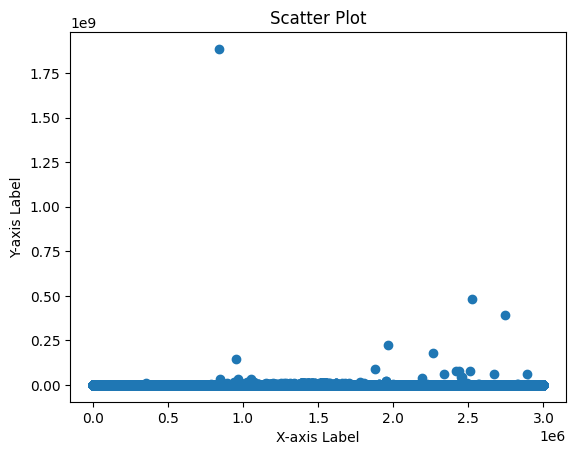

In [ ]:
import matplotlib.pyplot as plt

# create a scatter plot with x and y axis
plt.scatter(df['PRODUCT_ID'], df['PRODUCT_LENGTH'])

# add title and axis labels
plt.title('Scatter Plot')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# display the plot
plt.show()


1) predicting productlength  using linear regression model

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load train dataset
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')

# Fill null values with "NaN" in train dataframe
train_df = train_df.fillna("ABC")

# Extract features and target variable
X_train = train_df[['PRODUCT_ID']]
y_train = train_df['PRODUCT_LENGTH']

# Create Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Load test dataset
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

# Fill null values with "NaN" in test dataframe
test_df = test_df.fillna("ABC")

# Extract features
X_test = test_df[['PRODUCT_ID']]

# Predict the product length for test data
y_pred = lr.predict(X_test)

# Create a new dataframe to store the predictions
output_df = pd.DataFrame({'PRODUCT_ID': X_test['PRODUCT_ID'], 'PRODUCT_LENGTH': y_pred})

# Save the predictions to a CSV file
output_df.to_csv('predictions.csv', index=False)


** calculating Evaluation metric

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load train and test datasets
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
actual_df = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

# Create linear regression model
model = LinearRegression()

# Train the model on the training data
X_train = train_df[['PRODUCT_ID']]
y_train = train_df['PRODUCT_LENGTH']
model.fit(X_train, y_train)

# Make predictions on the test data
X_test = test_df[['PRODUCT_ID']]
y_pred = model.predict(X_test)

# Evaluate the model on the actual data
y_actual = actual_df['PRODUCT_LENGTH']
mae = mean_absolute_error(y_actual, y_pred)

# Calculate accuracy using the evaluation metric
score = max(0, 100*(1-mae/y_actual.mean()))
print('Accuracy:', score)


Accuracy: 0


2) predicting productlength using  decision tree regression

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Load train and test datasets
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')


# Fill null values with "NaN" in train and test dataframes
train_df = train_df.fillna("ABC")
test_df = test_df.fillna("ABC")

# Extract features and target variable from train dataset
X_train = train_df[['PRODUCT_ID']]
y_train = train_df['PRODUCT_LENGTH']

# Create Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Extract features from test dataset
X_test = test_df[['PRODUCT_ID']]

# Make predictions on test dataset
y_pred = dt.predict(X_test)

# Create a new DataFrame to store the predictions
pred_df = pd.DataFrame({'PRODUCT_ID': X_test['PRODUCT_ID'], 'PRODUCT_LENGTH':y_pred })

# Save the predictions to a CSV file
pred_df.to_csv('prediction.csv', index=False)


**finding accuracy using mean_absolute_error

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Load train and test datasets
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
actual_df = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')


# Fill null values with "NaN" in train and test dataframes
train_df = train_df.fillna("ABC")
test_df = test_df.fillna("ABC")
actual_df =actual_df.fillna("ABC")

# Extract features and target variable from train dataset
X_train = train_df[['PRODUCT_ID']]
y_train = train_df['PRODUCT_LENGTH']

# Create Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Extract features from test dataset
X_test = test_df[['PRODUCT_ID']]

# Make predictions on test dataset
y_pred = dt.predict(X_test)

# Create a new DataFrame to store the predictions
pred_df = pd.DataFrame({'PRODUCT_ID': X_test['PRODUCT_ID'], 'PRODUCT_LENGTH':y_pred })

# Save the predictions to a CSV file
pred_df.to_csv('prediction.csv', index=False)

y_actual = actual_df['PRODUCT_LENGTH']
mae = mean_absolute_error(y_actual, y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 4863.603471049861


**using Evaluation metric

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import numpy as np


# Load train and test datasets
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
actual_df = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')


# Fill null values with "NaN" in train and test dataframes
train_df = train_df.fillna("ABC")
test_df = test_df.fillna("ABC")
actual_df =actual_df.fillna("ABC")

# Extract features and target variable from train dataset
X_train = train_df[['PRODUCT_ID']]
y_train = train_df['PRODUCT_LENGTH']

# Create Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Extract features from test dataset
X_test = test_df[['PRODUCT_ID']]

# Make predictions on test dataset
y_pred = dt.predict(X_test)

# Create a new DataFrame to store the predictions
pred_df = pd.DataFrame({'PRODUCT_ID': X_test['PRODUCT_ID'], 'PRODUCT_LENGTH':y_pred })

# Save the predictions to a CSV file
pred_df.to_csv('prediction.csv', index=False)

y_actual = actual_df['PRODUCT_LENGTH']
mae = mean_absolute_error(y_actual, y_pred)
print('Mean Absolute Error:', mae)

def evaluate(y_true, y_pred):
    return max(0, 100 * (1 - np.mean(np.abs((y_true - y_pred) / y_true))))

score = evaluate(y_actual, y_pred)
print('Evaluation score:', score)


Mean Absolute Error: 4863.603471049861
Evaluation score: 0


3) predicting productlength using  simple neural network and finding accuracy and  Evaluation metric

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

# Load train and test datasets
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
actual_df = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

# Create neural network model
model = MLPRegressor(hidden_layer_sizes=(100,), random_state=42)

# Train the model on the training data
X_train = train_df[['PRODUCT_ID']]
y_train = train_df['PRODUCT_LENGTH']
model.fit(X_train, y_train)

# Make predictions on the test data
X_test = test_df[['PRODUCT_ID']]
y_pred = model.predict(X_test)

# Save the predictions to a CSV file
pred_df = pd.DataFrame({'PRODUCT_ID': test_df['PRODUCT_ID'], 'PRODUCT_LENGTH': y_pred})
pred_df.to_csv('predict.csv', index=False)

# Calculate accuracy on the actual data
y_actual = actual_df['PRODUCT_LENGTH']
accuracy = max(0, 100 * (1 - np.mean(np.abs((y_actual - y_pred) / y_actual))))
print('Accuracy:', accuracy)
